In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/paciente1/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

1619

In [6]:
with open('dataset/generado/paciente1/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

1619

In [8]:
with open('dataset/generado/paciente1/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

190

In [10]:
with open('dataset/generado/paciente1/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

190

In [12]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

96

In [14]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

96

In [79]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mse', mode='min', patience=5, min_delta=0.0001)

In [93]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [94]:
modelTranfer = keras.models.load_model('modelos/modeloGeneral_v2.h5')

In [95]:
modelTranfer.layers[0:]

In [96]:
for layer in modelTranfer.layers[0:]:
    layer.trainable = False

In [97]:
modelTranfer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [98]:
modelTranfer.compile(optimizer = keras.optimizers.Adam(learning_rate=0.000001), loss='mse', metrics=['mae','mse'])
history =modelTranfer.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
modelTranfer.save('modelos/modeloTranfer_p_q1.h5')

Epoch 1/50
51/51 [==============================] - 4s 31ms/step - loss: 0.0011 - mae: 0.0241 - mse: 0.0011 - val_loss: 6.0474e-04 - val_mae: 0.0176 - val_mse: 6.0474e-04
Epoch 2/50
51/51 [==============================] - 1s 18ms/step - loss: 0.0010 - mae: 0.0237 - mse: 0.0010 - val_loss: 6.0474e-04 - val_mae: 0.0176 - val_mse: 6.0474e-04
Epoch 3/50
51/51 [==============================] - 1s 17ms/step - loss: 0.0010 - mae: 0.0238 - mse: 0.0010 - val_loss: 6.0474e-04 - val_mae: 0.0176 - val_mse: 6.0474e-04
Epoch 4/50
51/51 [==============================] - 1s 17ms/step - loss: 0.0011 - mae: 0.0241 - mse: 0.0011 - val_loss: 6.0474e-04 - val_mae: 0.0176 - val_mse: 6.0474e-04
Epoch 5/50
51/51 [==============================] - 1s 18ms/step - loss: 0.0011 - mae: 0.0243 - mse: 0.0011 - val_loss: 6.0474e-04 - val_mae: 0.0176 - val_mse: 6.0474e-04
Epoch 6/50
51/51 [==============================] - 1s 18ms/step - loss: 0.0010 - mae: 0.0237 - mse: 0.0010 - val_loss: 6.0474e-04 - val_mae: 0.0

3/3 [==============================] - 0s 16ms/step - loss: 0.0017 - mae: 0.0319 - mse: 0.0017
test loss, test acc: [0.0017028864240273833, 0.03191203996539116, 0.0017028864240273833]


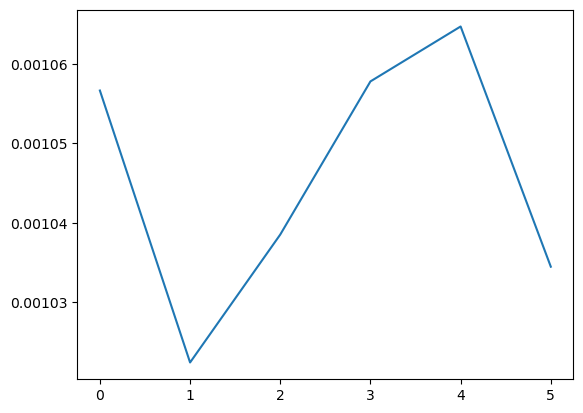

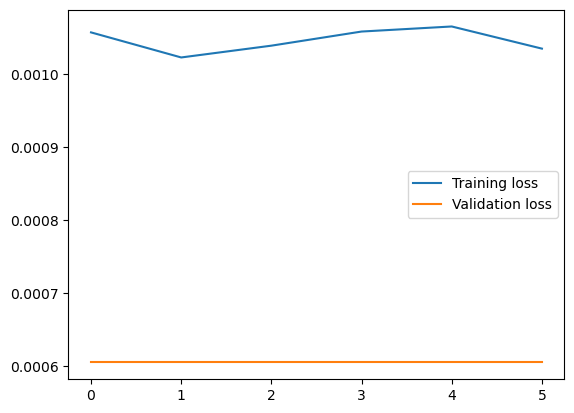

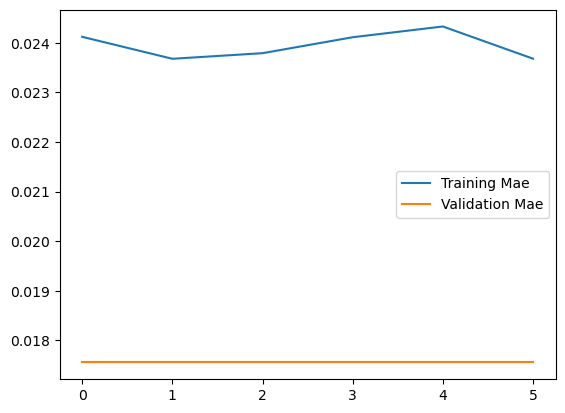

In [99]:
model_utils.modelEvaluateTraining(modelTranfer,history,array_Xtest, array_Ytest)

3/3 [==============================] - 0s 10ms/step


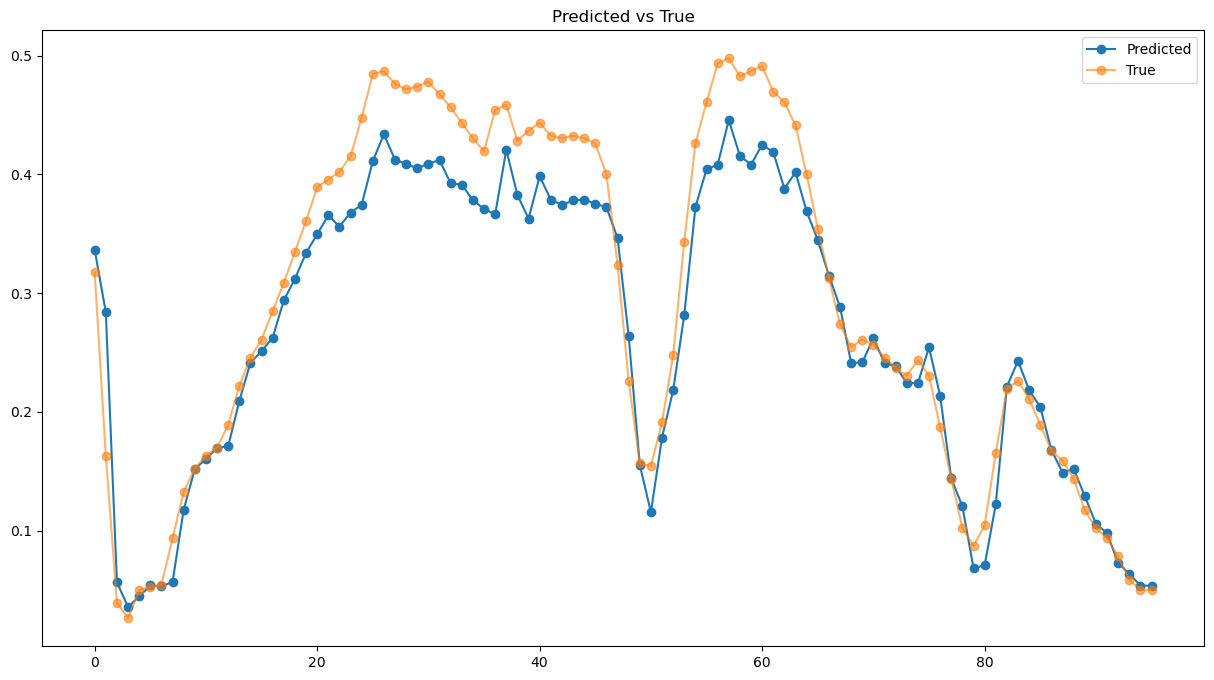

In [100]:
yhat = modelTranfer.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [101]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.031912037685000595,
 'mse': 0.04126604592992938,
 'rmse': 0.001702886546691041}